In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\교통사고정보개방시스템\스쿨존내어린이 사고다발지역정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\스쿨존내어린이 사고다발지역정보\\AccidentHazard_CodeList (1).xlsx',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\교통사고정보개방시스템\\스쿨존내어린이 사고다발지역정보\\12_21_schoolzone.csv']

In [4]:
meta_df = pd.read_excel(files[0],sheet_name=[0])
df = pd.read_csv(files[1],encoding='cp949')
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,99210,2013060,1111016900,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,126.999607,37.588413,"{""type"":""Polygon"",""coordinates"":[[[127.002009,..."
1,99846,2013060,1129013500,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,127.035733,37.595505,"{""type"":""Polygon"",""coordinates"":[[[127.0381354..."
2,98904,2013060,1129011000,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,127.014564,37.597571,"{""type"":""Polygon"",""coordinates"":[[[127.0169658..."
3,99206,2013060,1129013900,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,127.059596,37.610429,"{""type"":""Polygon"",""coordinates"":[[[127.0619982..."
4,99209,2013060,1132010500,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,127.024430,37.648129,"{""type"":""Polygon"",""coordinates"":[[[127.0268336..."


In [5]:
meta_df = meta_df[0].fillna(method='ffill').groupby([' ','년도'],as_index=False)['searchYearCd 입력값'].max()

In [6]:
meta_df[' '] = meta_df[' '].apply(lambda x:x.replace('\n',' '))
meta_df['구분'] = meta_df.apply(lambda x:x['년도'].split()[0] + ' ' + x[' '],axis=1)

In [7]:
meta_df

,,년도,searchYearCd 입력값,구분
0,결빙 사고다발지역,13-17년 결빙 사고다발지역,2018091.0,13-17년 결빙 사고다발지역
1,결빙 사고다발지역,14-18년 결빙 사고다발지역,2019079.0,14-18년 결빙 사고다발지역
2,결빙 사고다발지역,15-19년 결빙 사고다발지역,2020036.0,15-19년 결빙 사고다발지역
3,결빙 사고다발지역,16-20년 결빙 사고다발지역,2021029.0,16-20년 결빙 사고다발지역
4,결빙 사고다발지역,17-21년 결빙 사고다발지역,2022082.0,17-21년 결빙 사고다발지역
...,...,...,...,...
73,지자체별 사고다발지역,18년 지자체별 사고다발지,2019056.0,18년 지자체별 사고다발지역
74,지자체별 사고다발지역,19년 지자체별 사고다발지,2020087.0,19년 지자체별 사고다발지역
75,지자체별 사고다발지역,20년 지자체별 사고다발지,2021056.0,20년 지자체별 사고다발지역
76,지자체별 사고다발지역,21년 지자체별 사고다발지,2022046.0,21년 지자체별 사고다발지역


In [10]:
def convert_id(x):
    idx = meta_df[meta_df['searchYearCd 입력값']==x].index[0]
    return meta_df['구분'].loc[idx]
df['사고다발지ID'] = df['사고다발지ID'].apply(convert_id)

In [11]:
df['시도'] = df['시도시군구명'].apply(lambda x:x.split()[0])
df['구군'] = df['시도시군구명'].apply(lambda x:re.search(r'[^0-9]*',x.split()[1])[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  391 non-null    int64  
 1   사고다발지ID   391 non-null    object 
 2   법정동코드     391 non-null    int64  
 3   지점코드      391 non-null    int64  
 4   시도시군구명    391 non-null    object 
 5   지점명       391 non-null    object 
 6   발생건수      391 non-null    int64  
 7   사상자수      391 non-null    int64  
 8   사망자수      391 non-null    int64  
 9   중상자수      391 non-null    int64  
 10  경상자수      391 non-null    int64  
 11  부상신고자수    391 non-null    int64  
 12  경도        391 non-null    float64
 13  위도        391 non-null    float64
 14  다발지역폴리곤   391 non-null    object 
 15  시도        391 non-null    object 
 16  구군        391 non-null    object 
dtypes: float64(2), int64(9), object(6)
memory usage: 52.1+ KB


In [13]:
df.describe()

,사고다발지FID,법정동코드,지점코드,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
count,3.910000e+02,3.910000e+02,3.910000e+02,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,5.417282e+06,2.941087e+09,3.301826e+07,2.051151,2.207161,0.115090,0.736573,1.276215,0.079284,127.570899,36.411088
std,2.306569e+06,1.561916e+09,1.256391e+07,0.503773,0.754847,0.327465,0.767726,0.942132,0.279845,0.916099,1.124541
min,9.888500e+04,1.123011e+07,1.111000e+07,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,126.266435,33.251402
25%,6.090170e+06,1.163510e+09,2.641000e+07,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,126.868434,35.274631
50%,6.393989e+06,3.014010e+09,3.120000e+07,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,127.117375,36.612201
75%,6.596494e+06,4.216011e+09,4.311300e+07,2.000000,2.000000,0.000000,1.000000,2.000000,0.000000,128.532896,37.484853
max,6.779864e+06,5.013011e+09,5.013000e+07,4.000000,7.000000,2.000000,3.000000,6.000000,2.000000,129.401310,38.075399


In [14]:
df.describe(include=np.object)

,사고다발지ID,시도시군구명,지점명,다발지역폴리곤,시도,구군
count,391,391,391,391,391,391
unique,10,189,361,391,17,116
top,16년 스쿨존내 어린이사고 다발지역,경기도 안산시 단원구1,경기도 안산시 단원구 선부동(안산화정초교 부근),"{""type"":""Polygon"",""coordinates"":[[[127.002009,...",경기도,안산시
freq,47,9,5,1,74,24


**연도별 사상자 및 비율은?**

**각 시도의 연도별 발생건수는?**

**각 시도의 구군별 발생건수는?**

## 시각화

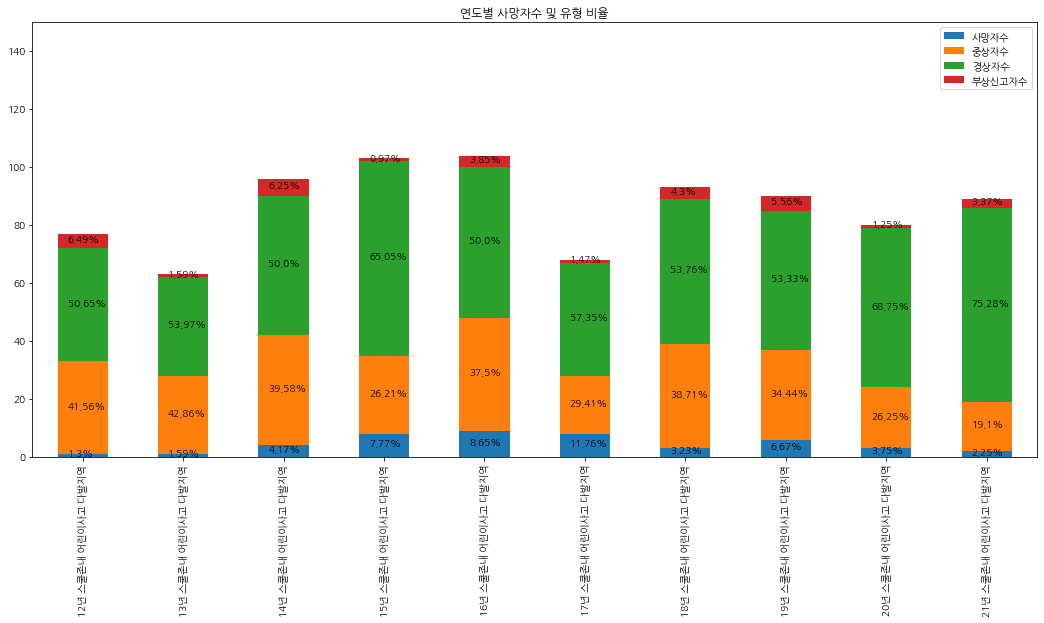

In [17]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
axes.set_ylim([0,150])
axes.set_title('연도별 사망자수 및 유형 비율')
sub_df = df.groupby('사고다발지ID',as_index=False)[['사망자수','중상자수','경상자수','부상신고자수']].sum()
bars = sub_df.iloc[:,[1,2,3,4]].plot(kind='bar', stacked=True,ax=axes)
xticks = plt.xticks([i for i in range(len(sub_df))],labels=sub_df['사고다발지ID'].values)
for i in range(len(sub_df)):
    height = axes.patches[i].get_height() + axes.patches[i+10].get_height() + axes.patches[i+20].get_height() + axes.patches[i+30].get_height()
    h1 = round(axes.patches[i].get_height()/height*100,2)
    h2 = round(axes.patches[i+10].get_height()/height*100,2)
    h3 = round(axes.patches[i+20].get_height()/height*100,2)
    h4 = round(axes.patches[i+30].get_height()/height*100,2)
    height = int(height)
    ann_height = height+200
    axes.annotate(str(height),(axes.patches[i].get_x()+0.1, ann_height))
    axes.annotate(str(h1)+'%',(axes.patches[i].get_x()+0.1, 0.5*h1/100*height))
    axes.annotate(str(h2)+'%',(axes.patches[i].get_x()+0.1, (h1+0.5*h2)/100*height))
    axes.annotate(str(h3)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+0.5*h3)/100*height))
    axes.annotate(str(h4)+'%',(axes.patches[i].get_x()+0.1, (h1+h2+h3+0.5*h4)/100*height))

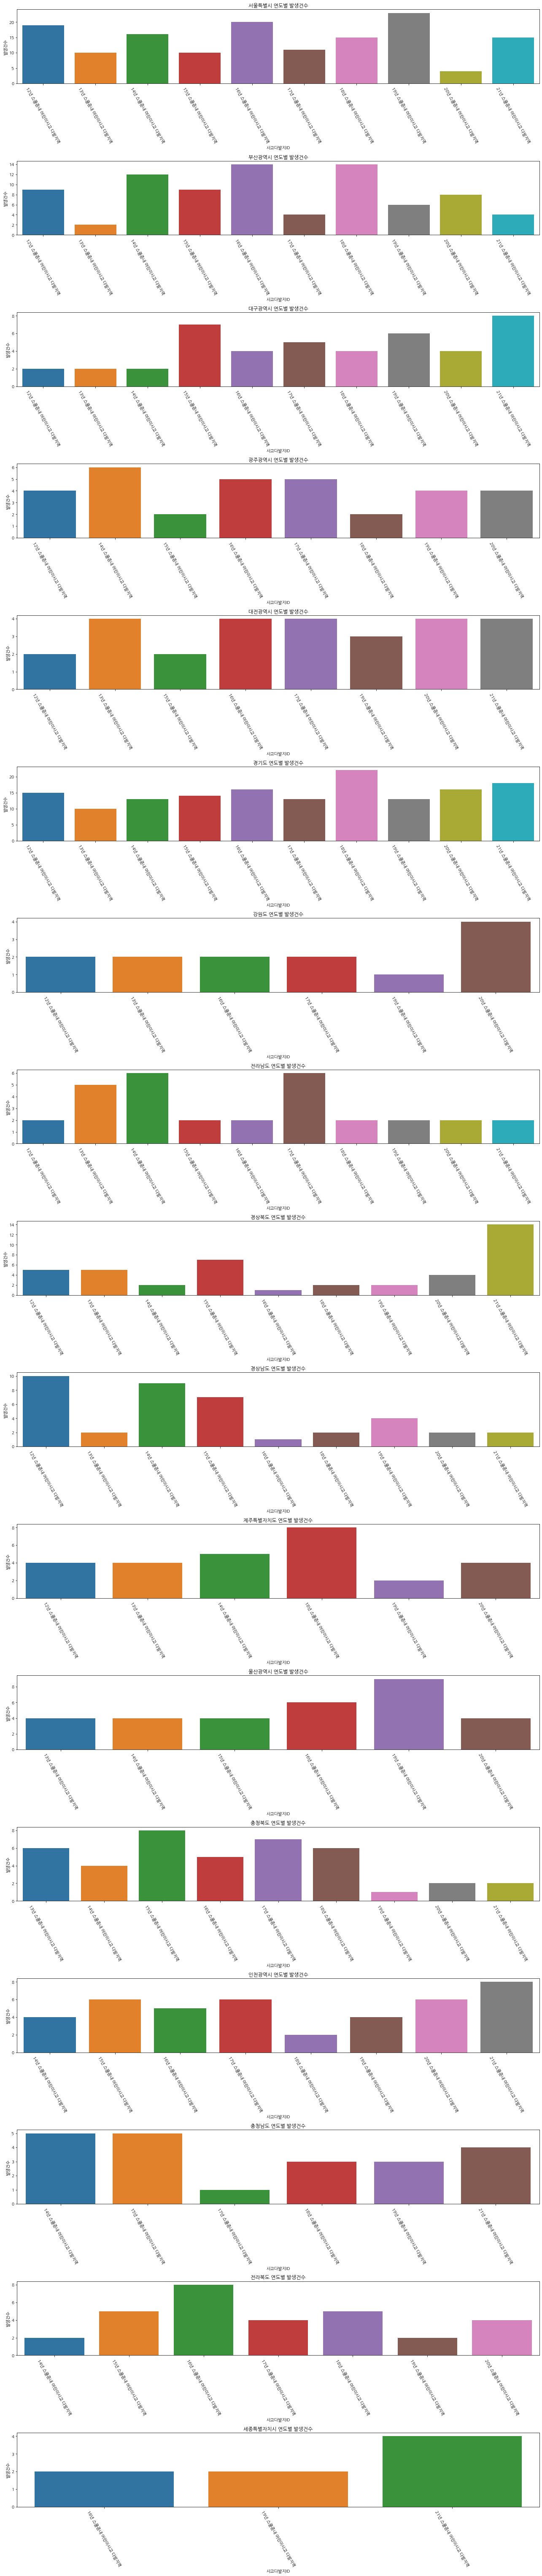

In [20]:
fig,axes = plt.subplots(17,1,figsize=(18,85))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('사고다발지ID',as_index=False)['발생건수'].sum()
    sns.barplot(data=sub_df,x='사고다발지ID',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=-60)
plt.tight_layout()

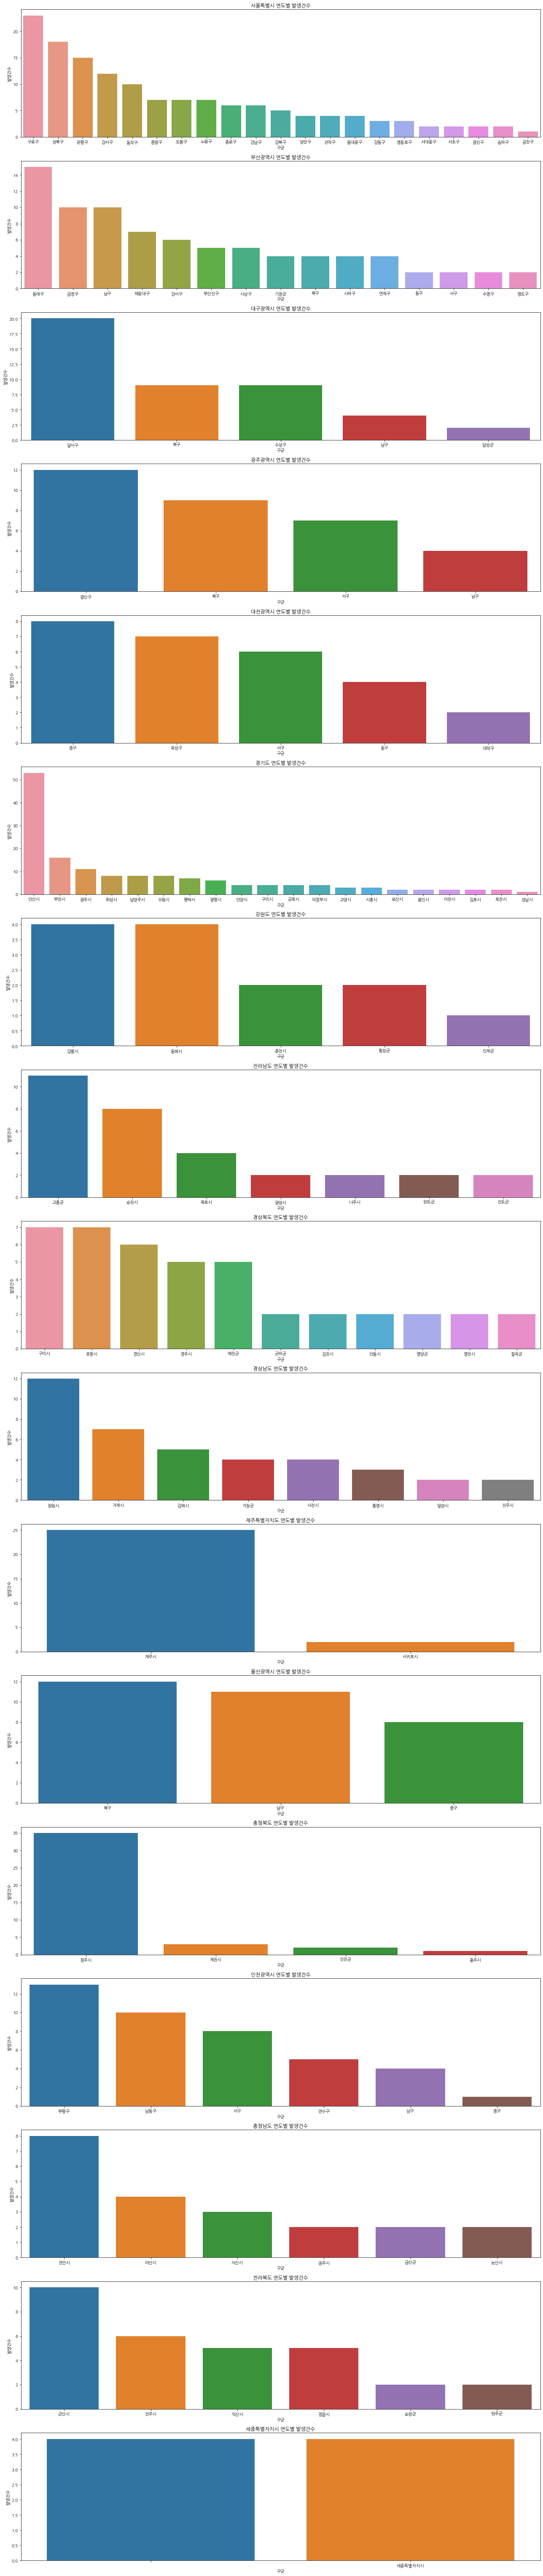

In [21]:
fig,axes = plt.subplots(17,1,figsize=(18,85))
for i,c in enumerate(df['시도'].unique()):
    sub_df = df[df['시도']==c].groupby('구군',as_index=False)['발생건수'].sum().sort_values('발생건수',ascending=False)
    sns.barplot(data=sub_df,x='구군',y='발생건수',ax=axes[i]).set(title=f'{c} 연도별 발생건수')
plt.tight_layout()
    